In [104]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import pyro
import pyro.distributions as dist
from pyro.infer import Predictive, NUTS, MCMC
import torch
import arviz as az

In [105]:
df = pd.read_csv('../data/year_bloom_doy_merged.csv')

In [106]:
year = df['year'].values
locations = pd.Categorical(df['location']).codes
y = df['bloom_doy'].values
y_scaled = (y - y.mean()) / (y.std())
t = year / year.max()
t_unique = np.unique(t)
y_scaled = torch.tensor(y_scaled, dtype=torch.float32)
locations = torch.tensor(locations, dtype=torch.long)

In [107]:
KYOTO = df[df['location'] == 'kyoto']
DC = df[df['location'] == 'washingtondc']
SCHWEIZ = df[df['location'] == 'liestal']

In [109]:
inf = az.from_netcdf('../models/multi_level')

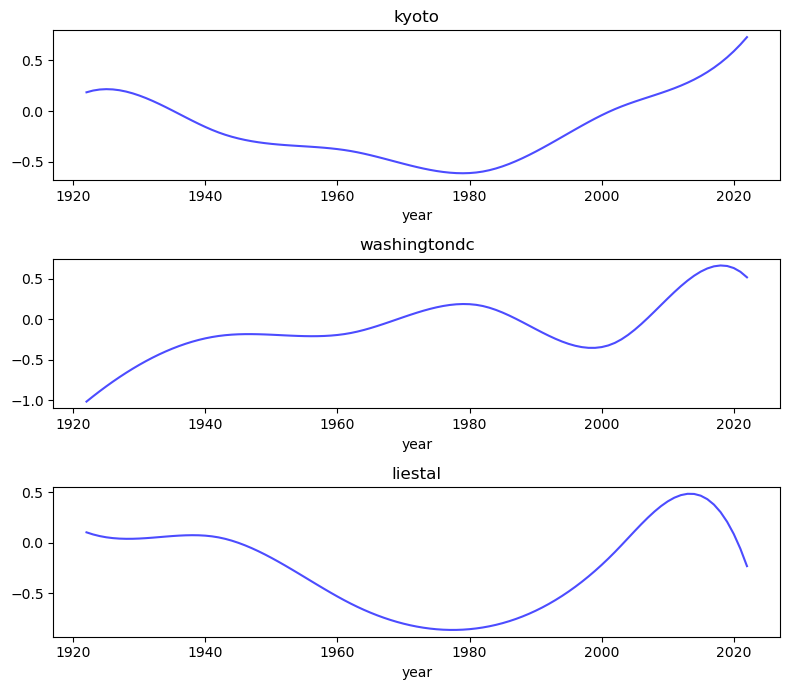

In [110]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 7))
for cnt, loc in enumerate([KYOTO, DC, SCHWEIZ]):
    name = loc['location'].unique()[0]
    sns.lineplot(
        x=loc['year'], y=inf['prior_predictive']['mu_loc'].to_numpy()[0].mean(axis=0).T[cnt], 
        ax=axes[cnt], color='blue', alpha=0.70)
    axes[cnt].set_title(f"{name}")

plt.tight_layout()

<Figure size 1000x500 with 0 Axes>

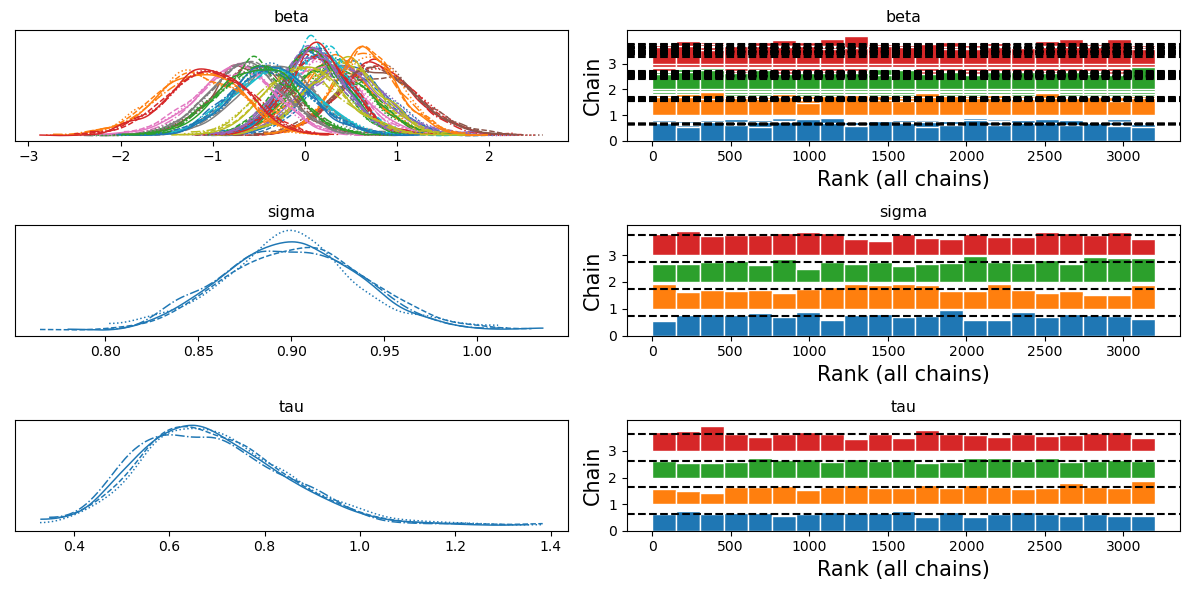

In [111]:
plt.figure(figsize=(10, 5))
az.plot_trace(
    data=inf,
    kind='rank_bars'
)
plt.tight_layout();

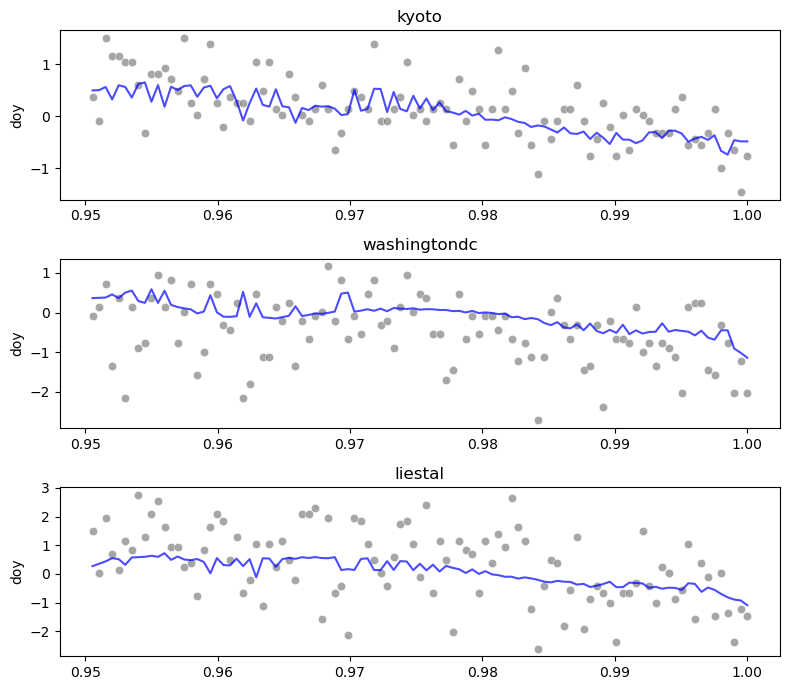

In [113]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 7))
for cnt, loc in enumerate([KYOTO, DC, SCHWEIZ]):
    name = loc['location'].unique()[0]
    sns.scatterplot(
        x=t[loc.index], 
        y=y_scaled[loc.index], 
        ax=axes[cnt], color='grey', alpha=0.70)
    sns.lineplot(
        x=t[loc.index], 
        y=inf['posterior_predictive']['doy'][0].mean(axis=0)[loc.index], 
        ax=axes[cnt], color='blue', alpha=0.70)
    axes[cnt].set_title(f"{name}")

    plt.tight_layout()